### Collaborative Filtering using Python

In [53]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
path = "u.data" 
df = pd.read_csv(path, sep='\t', names =['UserID','ItemID','Rating','Timestamp']) 


In [11]:
df.head()

,UserID,ItemID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
df.columns

Index(['UserID', 'ItemID', 'Rating', 'Timestamp'], dtype='object')

In [13]:
df.shape

(100000, 4)

(array([  6110.,      0.,  11370.,      0.,      0.,  27145.,      0.,
         34174.,      0.,  21201.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

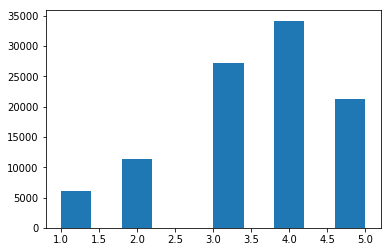

In [21]:
plt.hist(df['Rating'])

In [22]:
df.groupby(['Rating'])['UserID'].count()

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

In [32]:
df['UserID'].groupby(df['Rating']).count()

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

(array([  1.14600000e+03,   2.49000000e+02,   1.39000000e+02,
          6.70000000e+01,   3.80000000e+01,   2.40000000e+01,
          7.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   59.2,  117.4,  175.6,  233.8,  292. ,  350.2,  408.4,
         466.6,  524.8,  583. ]),
 <a list of 10 Patch objects>)

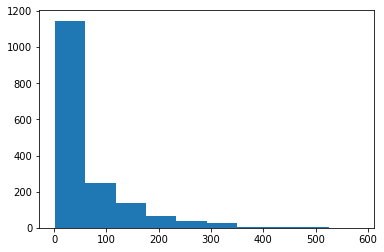

In [24]:
plt.hist(df.groupby(['ItemID'])['ItemID'].count())

In [35]:
#create a variable n_users to find the total number of unique users in the data.
n_users = df.UserID.unique().shape[0] 

#create a variable n_items to find the total number of unique movies in the data
n_items = df['ItemID'].unique().shape[0] 

#print the counts of unique users and movies
print(str(n_users) + ' users') 

print(str(n_items) + ' movies') 

943 users
1682 movies


In [40]:
#create a zero value matrix of size (n_users X n_items) to store the ratings in the cell of the matrix ratings.
ratings = np.zeros((n_users, n_items)) 
# for each tuple in the dataframe, df extract the information of each column of the row and store into the rating matrix cell value as below
for  row in df.itertuples():
	ratings[row[1]-1, row[2]-1] = row[3] 



In [41]:
type(ratings)

numpy.ndarray

In [42]:
ratings.shape

(943, 1682)

In [43]:
ratings

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

In [45]:
#sparsity
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 6.30%


In [48]:
ratings_train, ratings_test = train_test_split(ratings,test_size=0.33, random_state=42)

In [49]:
ratings_train.shape

(631, 1682)

In [50]:
ratings_test.shape

(312, 1682)

#### For user-based collaborative filtering, we predict that a user's rating for an item is given by
#### the weighted sum of all other users' ratings for that item, where the weighting is the cosine
#### similarity between each user and the input user.

### The steps for building a UBCF

-Creating a similarity matrix between the users

-Predicting the unknown rating value of item i for an active user u by calculating the
weighted sum of all the users' ratings for the item. Here the weighting is the cosine similarity calculated in the previous step between the user and neighboring users.

-Recommending the new items to the users.

In [54]:
# User-based similarity calculation
dist_out = 1-sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [55]:
dist_out.shape

(631, 631)

In [56]:
dist_out

array([[ 1.        ,  0.36475764,  0.44246231, ...,  0.02010641,
         0.33107929,  0.25638518],
       [ 0.36475764,  1.        ,  0.42635255, ...,  0.06694419,
         0.27339314,  0.22337268],
       [ 0.44246231,  0.42635255,  1.        , ...,  0.06675756,
         0.25424373,  0.22320126],
       ..., 
       [ 0.02010641,  0.06694419,  0.06675756, ...,  1.        ,
         0.04853428,  0.05142508],
       [ 0.33107929,  0.27339314,  0.25424373, ...,  0.04853428,
         1.        ,  0.1198022 ],
       [ 0.25638518,  0.22337268,  0.22320126, ...,  0.05142508,
         0.1198022 ,  1.        ]])

In [58]:
#Predicting the unknown ratings for an active user
user_pred = dist_out.dot(ratings_train) / np.array([np.abs(dist_out).sum(axis=1)]).T

In [59]:
user_pred

array([[ 2.46573349,  0.82987753,  0.46745119, ...,  0.        ,
         0.01051423,  0.00930566],
       [ 2.20129624,  0.5513313 ,  0.44342882, ...,  0.        ,
         0.00682653,  0.00629833],
       [ 2.23857808,  0.68874746,  0.45178516, ...,  0.        ,
         0.00863713,  0.0084224 ],
       ..., 
       [ 1.74346476,  0.40503715,  0.32435436, ...,  0.        ,
         0.00284126,  0.0094319 ],
       [ 2.32393481,  0.81386209,  0.48334765, ...,  0.        ,
         0.01058346,  0.01011386],
       [ 2.35304498,  0.59746852,  0.38845057, ...,  0.        ,
         0.00669755,  0.00562433]])

In [60]:
#MSE
from sklearn.metrics import mean_squared_error
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [61]:
get_mse(user_pred, ratings_train)

7.8821939915510031

In [62]:
get_mse(user_pred, ratings_test)

8.9224954316965484

### User-based collaborative filtering with the k nearest neighbors

In [63]:
from sklearn.neighbors import NearestNeighbors

In [64]:
k=5

In [65]:
neigh = NearestNeighbors(k,'cosine')

In [66]:
neigh.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius='cosine')

In [67]:
#calculate the top5 similar users for each user and their similarity  values,
#i.e. the distance values between each pair of users.
top_k_distances,top_k_users = neigh.kneighbors(ratings_train, return_distance=True)


In [68]:
top_k_distances.shape

(631, 5)

In [69]:
top_k_users.shape

(631, 5)

In [70]:
top_k_users[0]

array([  0,  82, 511, 184, 207], dtype=int64)

In [71]:
# choose only the top five users for each user and use their rating information while
# predicting the ratings using the weighted sum of all of the ratings of these
# top five similar users.

In [72]:
user_pred_k = np.zeros(ratings_train.shape)

In [74]:
for i in range(ratings_train.shape[0]):
    user_pred_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i])/np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [75]:
user_pred_k.shape

(631, 1682)

In [76]:
user_pred_k

array([[ 3.25379713,  1.75556855,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.48370298,  0.        ,  1.24948776, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.01011767,  0.73826825,  0.7451635 , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.74469557,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.9753676 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [77]:
# MSE
get_mse(user_pred_k, ratings_train)

8.1956065114538781

In [78]:
get_mse(user_pred_k, ratings_test)

11.602073790588975

### Item-based recommendations

In [79]:
k = ratings_train.shape[1]
neigh = NearestNeighbors(k,'cosine')

In [80]:
neigh.fit(ratings_train.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1682, p=2,
         radius='cosine')

In [81]:
#calcualte the cosine similarity distance between each movie pairs
top_k_distances,top_k_users = neigh.kneighbors(ratings_train.T, return_distance=True)
top_k_distances.shape

(1682, 1682)

In [86]:
# predict the movie ratings
item_pred = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

In [87]:
item_pred.shape

(631, 1682)

In [88]:
item_pred

array([[ 0.        ,  0.51752631,  0.60019695, ...,  2.31664301,
         2.34134745,  2.46671096],
       [ 0.        ,  0.31976603,  0.37168534, ...,  1.34680571,
         1.34897863,  1.44314592],
       [ 0.        ,  0.50619664,  0.58685005, ...,  2.5337623 ,
         2.57055505,  2.74749235],
       ..., 
       [ 0.        ,  0.08945322,  0.10271303, ...,  0.41949597,
         0.41995047,  0.45733339],
       [ 0.        ,  0.25785693,  0.29819614, ...,  1.30767892,
         1.32470838,  1.41198324],
       [ 0.        ,  0.07197376,  0.08524505, ...,  0.25523416,
         0.25259761,  0.26155752]])

In [89]:
#MSE
get_mse(item_pred, ratings_train)

11.130000188318895

In [90]:
get_mse(item_pred,ratings_test)

12.128683035513326